- gene attribution distributions
- get genes with higher mean attributions
- plot distributions

In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt


In [13]:
os.chdir('../..')

### analyze gene attribution distributions

First, model #16:

In [1]:
lrz_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj/'


In [6]:
# attr_all_22085_genes = pd.read_pickle('4.model/pred/attr_all_22085_genes_16_50_samples.pkl')
attr_all_22085_genes = pd.read_pickle(lrz_path + 'large_preprocessed_files/attr_all_genes/attr_all_22085_genes_16_50_samples.pkl')[0]   # only [0] for now
attr_all_22085_genes.shape

(350, 22085)

In [15]:
# Consider mean of absolute attributions
# First: consider all 22085 genes
abs_mean_attributions = np.mean(np.abs(attr_all_22085_genes), axis=0)

distribution = np.histogram(abs_mean_attributions, bins=10)

print("Distribution of absolute values of mean attributions per gene for all genes:")
for value, count in zip(distribution[1], distribution[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution[1][1], count))

Distribution of absolute values of mean attributions per gene for all genes:
Range: 0.00000 - 0.00192, Count: 19880
Range: 0.00191 - 0.00383, Count: 1925
Range: 0.00382 - 0.00574, Count: 212
Range: 0.00573 - 0.00765, Count: 47
Range: 0.00765 - 0.00956, Count: 11
Range: 0.00956 - 0.01147, Count: 4
Range: 0.01147 - 0.01338, Count: 2
Range: 0.01338 - 0.01529, Count: 1
Range: 0.01529 - 0.01720, Count: 2
Range: 0.01720 - 0.01911, Count: 1


In [17]:
# Now, consider 22001 non-handselected genes
genes_22001 = np.loadtxt('2.preprocess_to_feature/cite/all_22001_genes_names.txt', dtype=str)
abs_mean_attributions_others = np.mean(np.abs(np.array(attr_all_22085_genes)[:, :22001]), axis=0)

distribution_others = np.histogram(abs_mean_attributions_others, bins=distribution[1])

print("Distribution of absolute values of mean attributions per column of 22001 genes:")
for value, count in zip(distribution_others[1], distribution_others[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_others[1][1], count))

# get top attributing genes
genes_higher_attr_others_idx = np.where(abs_mean_attributions_others >= 0.00766)[0]   # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_others_idx)
print('Top attributing genes:')
genes_higher_attr_others = genes_22001[genes_higher_attr_others_idx]
genes_higher_attr_others

Distribution of absolute values of mean attributions per column of 22001 genes:
Range: 0.00000 - 0.00192, Count: 19833
Range: 0.00191 - 0.00383, Count: 1894
Range: 0.00382 - 0.00574, Count: 212
Range: 0.00573 - 0.00765, Count: 45
Range: 0.00765 - 0.00956, Count: 9
Range: 0.00956 - 0.01147, Count: 4
Range: 0.01147 - 0.01338, Count: 2
Range: 0.01338 - 0.01529, Count: 1
Range: 0.01529 - 0.01720, Count: 1
Range: 0.01720 - 0.01911, Count: 0
Top attributing genes:


array(['ENSG00000236824_BCYRN1', 'ENSG00000105205_CLC',
       'ENSG00000105472_CLEC11A', 'ENSG00000077984_CST7',
       'ENSG00000170891_CYTL1', 'ENSG00000184897_H1FX',
       'ENSG00000244734_HBB', 'ENSG00000126264_HCST',
       'ENSG00000100097_LGALS1', 'ENSG00000005381_MPO',
       'ENSG00000125148_MT2A', 'ENSG00000245532_NEAT1',
       'ENSG00000183971_NPW', 'ENSG00000171848_RRM2',
       'ENSG00000124766_SOX4', 'ENSG00000122862_SRGN',
       'ENSG00000265972_TXNIP'], dtype='<U41')

In [21]:
# Now, consider 84 handselected genes
genes_handselected = np.loadtxt('2.preprocess_to_feature/cite/handselected_84_gene_ids.txt', dtype=str)
abs_mean_attributions_handselected = np.mean(np.abs(np.array(attr_all_22085_genes)[:, -84:]), axis=0)

distribution_handselected = np.histogram(abs_mean_attributions_handselected, bins=10)

print("Distribution of absolute values of mean attributions per handselected gene:")
for value, count in zip(distribution_handselected[1], distribution_handselected[0]):
    print("Range: {:.5f} - {:.5f}, Count: {}".format(value, value + distribution_handselected[1][1], count))

# get top attributing genes
genes_higher_attr_handselected_idx = np.where(abs_mean_attributions_handselected >= 0.00386)[0]    # I chose this threshold to get genes in smaller bins
# print(genes_higher_attr_handselected_idx)
print('Top attributing genes:')
genes_higher_attr_handselected = [genes_handselected[idx] for idx in genes_higher_attr_handselected_idx]
genes_higher_attr_handselected

Distribution of absolute values of mean attributions per handselected gene:
Range: 0.00022 - 0.00234, Count: 56
Range: 0.00211 - 0.00423, Count: 22
Range: 0.00400 - 0.00611, Count: 1
Range: 0.00589 - 0.00800, Count: 2
Range: 0.00778 - 0.00989, Count: 1
Range: 0.00967 - 0.01178, Count: 0
Range: 0.01156 - 0.01367, Count: 0
Range: 0.01344 - 0.01556, Count: 0
Range: 0.01533 - 0.01745, Count: 1
Range: 0.01722 - 0.01933, Count: 1
Top attributing genes:


['ENSG00000135218_CD36',
 'ENSG00000117091_CD48',
 'ENSG00000114013_CD86',
 'ENSG00000010278_CD9',
 'ENSG00000128040_SPINK2',
 'ENSG00000072274_TFRC']

In [22]:
# print genes with mean attribution 0 if they exist
try:
    index_attr_0 = abs_mean_attributions_handselected.tolist().index(0)
    print(index_attr_0)    
    print('Gene with mean attribution 0: ', gene_ids[index_attr_0])
except:
    print('There is no gene with mean attribution 0.')

There is no gene with mean attribution 0.


#### analyze sorted mean abs. attribution for handselected and other genes
#### => values above/to the right of the elbow represent the genes with higher mean attributions

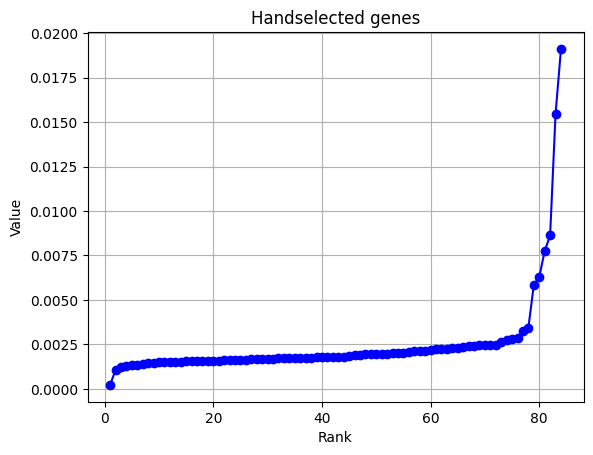

In [23]:
values = np.sort(abs_mean_attributions_handselected)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Value')
plt.title('Handselected genes')
plt.grid(True)
plt.show()

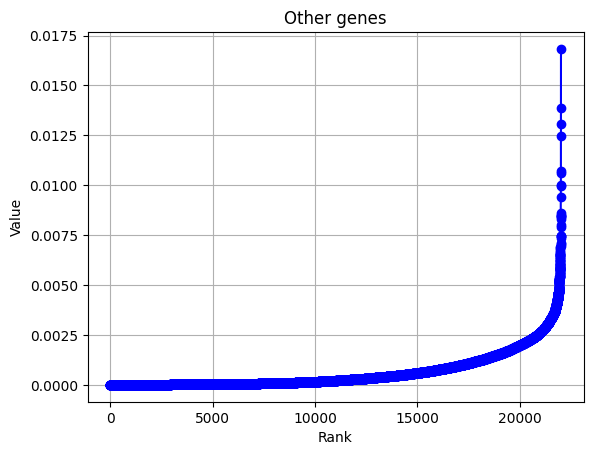

In [24]:
values = np.sort(abs_mean_attributions_others)
ranks = np.arange(1, len(values) + 1)

plt.plot(ranks, values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rank')
plt.ylabel('Value')
plt.title('Other genes')
plt.grid(True)
plt.show()

In [ ]:
# TODO plot these in one plot: seaborn scatterplot hue

In [27]:
# check if the genes with higher mean attribution are among the top 20 features shown in shap plot
top_20_feature_names_shap = np.load('4.model/pred/top_feature_names_16.npy', allow_pickle=True)

print('Handselected genes:')
for i in genes_higher_attr_handselected:
    print(i, i in top_20_feature_names_shap)  # CD9 and SPINK2 are not among top 20
    
print('Other genes:')
for i in genes_higher_attr_others:
    print(i, i in top_20_feature_names_shap)  # these are all True => all among top 20

Handselected genes:
ENSG00000135218_CD36 True
ENSG00000117091_CD48 True
ENSG00000114013_CD86 False
ENSG00000010278_CD9 False
ENSG00000128040_SPINK2 False
ENSG00000072274_TFRC True
Other genes:
ENSG00000236824_BCYRN1 True
ENSG00000105205_CLC True
ENSG00000105472_CLEC11A True
ENSG00000077984_CST7 True
ENSG00000170891_CYTL1 True
ENSG00000184897_H1FX True
ENSG00000244734_HBB True
ENSG00000126264_HCST True
ENSG00000100097_LGALS1 True
ENSG00000005381_MPO True
ENSG00000125148_MT2A True
ENSG00000245532_NEAT1 True
ENSG00000183971_NPW True
ENSG00000171848_RRM2 True
ENSG00000124766_SOX4 True
ENSG00000122862_SRGN True
ENSG00000265972_TXNIP True


In [28]:
# compute gini index of mean attributions and include in plot below
def gini(arr):    # range from 0 (total equality) to 1 (absolute inequality)
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

print(gini(abs_mean_attributions_handselected))
print(gini(abs_mean_attributions_others))


# TODO put plots into one with same y-axis scale

0.3232057659812779
0.6643587094273422


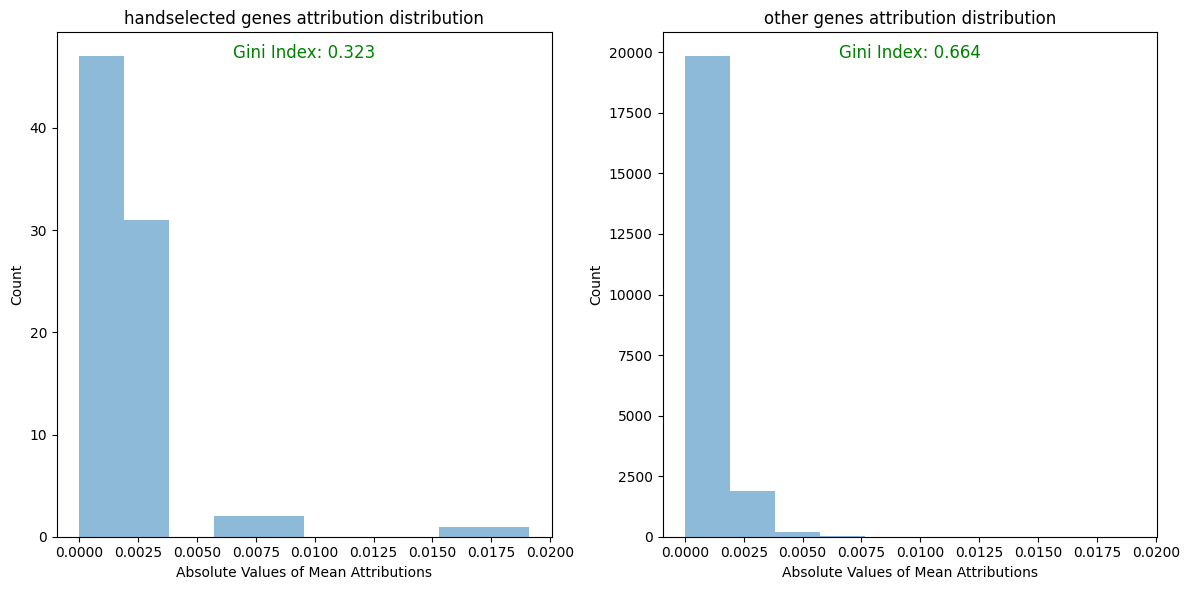

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5)  # bins=distribution[1]  # bins=log_bins
# ax1.set_xscale('log')
ax1.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_handselected):.3f}', transform=ax1.transAxes, ha='center', color='green', fontsize=12)

ax1.set_xlabel('Absolute Values of Mean Attributions')
ax1.set_ylabel('Count')
ax1.set_title('handselected genes attribution distribution')

ax2.hist(abs_mean_attributions_others, bins=distribution[1], alpha=0.5)
# ax2.set_xscale('log')
ax2.text(0.5, 0.95, f'Gini Index: {gini(abs_mean_attributions_others):.3f}', transform=ax2.transAxes, ha='center', color='green', fontsize=12)

ax2.set_xlabel('Absolute Values of Mean Attributions')
ax2.set_ylabel('Count')
ax2.set_title('other genes attribution distribution')

plt.tight_layout()
plt.show()

(0.0, 20824.65)


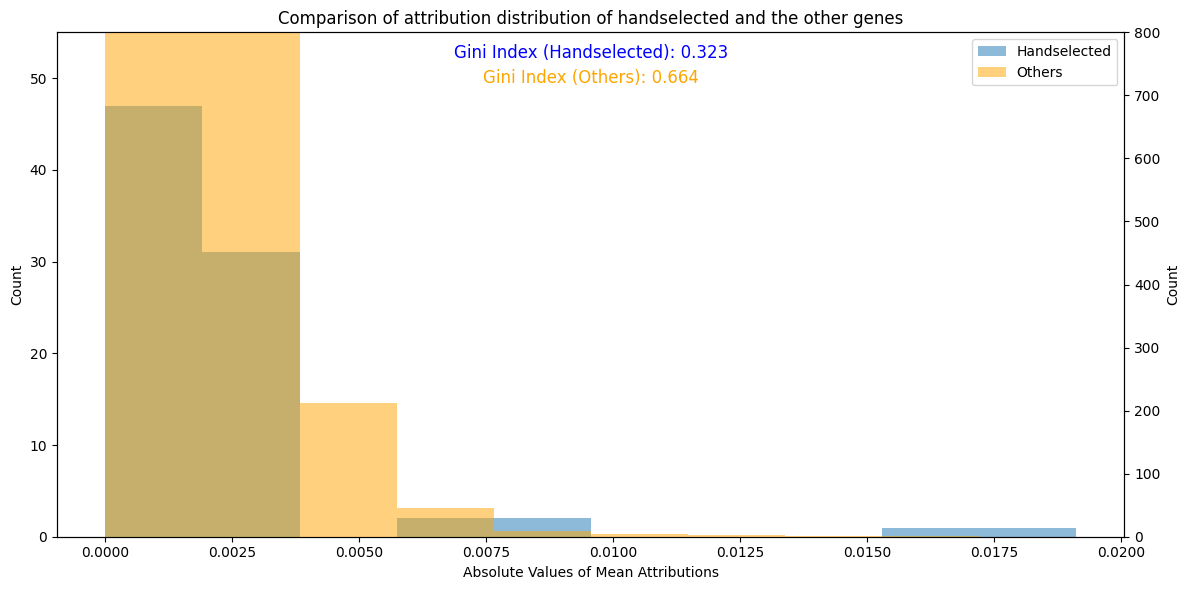

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(abs_mean_attributions_handselected, bins=distribution[1], alpha=0.5, label='Handselected')
ax.set_xlabel('Absolute Values of Mean Attributions')
ax.set_ylabel('Count')
ax.set_title('Comparison of attribution distribution of handselected and the other genes')

# Create a twin axis for the second histogram
ax2 = ax.twinx()

ax2.hist(abs_mean_attributions_others, bins=distribution[1], alpha=0.5, color='orange', label='Others')
ax2.set_ylabel('Count')

# Adjust the y-axis limits of the twin Axes to match the primary Axes
# ax.set_ylim(ax2.get_ylim())
print(ax2.get_ylim())
ax.set_ylim((0,55))
ax2.set_ylim((0,800))

# Add legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper right')

# Add Gini index labels
ax.text(0.5, 0.95, f'Gini Index (Handselected): {gini(abs_mean_attributions_handselected):.3f}', transform=ax.transAxes, ha='center', color='blue', fontsize=12)
ax2.text(0.5, 0.90, f'Gini Index (Others): {gini(abs_mean_attributions_others):.3f}', transform=ax2.transAxes, ha='center', color='orange', fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# TODO same density for both plots (same area of histograms) -> adjusts y-axes

In [34]:
# analyze svd components distr.
svd_comp_norm = np.loadtxt('2.preprocess_to_feature/cite/svd_comp_norm.txt', delimiter=',')

mean_svd_contr = np.mean(np.abs(svd_comp_norm), axis=0)
top_20_indices = np.argsort(mean_svd_contr)[-20:][::-1]

top_20_mean_contributions = mean_svd_contr[top_20_indices]
top_features_svd = []

# Print the top 20 columns and their mean contributionsb
print("Top 20 Columns with Highest Mean Contributions to SVDs:")
for column_index, mean_contribution in zip(top_20_indices, top_20_mean_contributions):
    print("Column: {}, Mean Contribution: {}".format(genes_22001[column_index], mean_contribution))
    top_features_svd.append(genes_22001[column_index])
# top_features_svd

Top 20 Columns with Highest Mean Contributions to SVDs:
Column: ENSG00000183971_NPW, Mean Contribution: 0.05371263880033439
Column: ENSG00000265972_TXNIP, Mean Contribution: 0.05304467293306914
Column: ENSG00000184897_H1FX, Mean Contribution: 0.050361890191894076
Column: ENSG00000100097_LGALS1, Mean Contribution: 0.04478373777794786
Column: ENSG00000244734_HBB, Mean Contribution: 0.04448112404531912
Column: ENSG00000170891_CYTL1, Mean Contribution: 0.04375964055004289
Column: ENSG00000125148_MT2A, Mean Contribution: 0.04370106634189597
Column: ENSG00000124766_SOX4, Mean Contribution: 0.043334829030293065
Column: ENSG00000196565_HBG2, Mean Contribution: 0.04226584332002403
Column: ENSG00000136997_MYC, Mean Contribution: 0.04127837825257075
Column: ENSG00000105472_CLEC11A, Mean Contribution: 0.03861755490861185
Column: ENSG00000143013_LMO4, Mean Contribution: 0.03811856453020823
Column: ENSG00000147872_PLIN2, Mean Contribution: 0.03761395295751413
Column: ENSG00000137193_PIM1, Mean Contr

In [36]:
# compare resulting genes
for i in top_features_svd:
    if i in top_20_feature_names_shap:
        print(i, 'among top 20 shap features')
    
    elif i in genes_higher_attr_handselected:
        print(i, 'among handselected genes with highest attributions')
    elif i in genes_higher_attr_others:
        print(i, 'among other genes with highest attributions')
    else:
        print(i)

ENSG00000183971_NPW among top 20 shap features
ENSG00000265972_TXNIP among top 20 shap features
ENSG00000184897_H1FX among top 20 shap features
ENSG00000100097_LGALS1 among top 20 shap features
ENSG00000244734_HBB among top 20 shap features
ENSG00000170891_CYTL1 among top 20 shap features
ENSG00000125148_MT2A among top 20 shap features
ENSG00000124766_SOX4 among top 20 shap features
ENSG00000196565_HBG2
ENSG00000136997_MYC
ENSG00000105472_CLEC11A among top 20 shap features
ENSG00000143013_LMO4
ENSG00000147872_PLIN2
ENSG00000137193_PIM1
ENSG00000101745_ANKRD12
ENSG00000160888_IER2
ENSG00000167552_TUBA1A
ENSG00000105205_CLC among top 20 shap features
ENSG00000236824_BCYRN1 among top 20 shap features
ENSG00000245532_NEAT1 among top 20 shap features
